In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,10))

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
        
    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [5]:
#하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [6]:
# Data Loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [7]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [8]:
X_train = train_image/255
X_test = test_image/255

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [9]:
train_label[0]

5

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)


In [12]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

# 모델의 크기 변경 

In [13]:
# 작은 모델 => layer층, unit수가 적은 것
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dense(8, activation='relu'))
    
    #Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


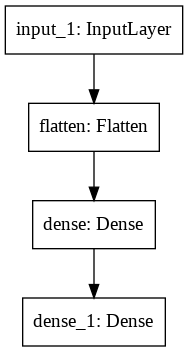

In [15]:
from keras.utils import plot_model
plot_model(model)

In [16]:
# 학습
history = model.fit(train_dataset,
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset,
          validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 1.3855 - accuracy: 0.5793 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8877 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9201 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2732 - val_accuracy: 0.9239
Epoch 

<Figure size 1080x720 with 0 Axes>

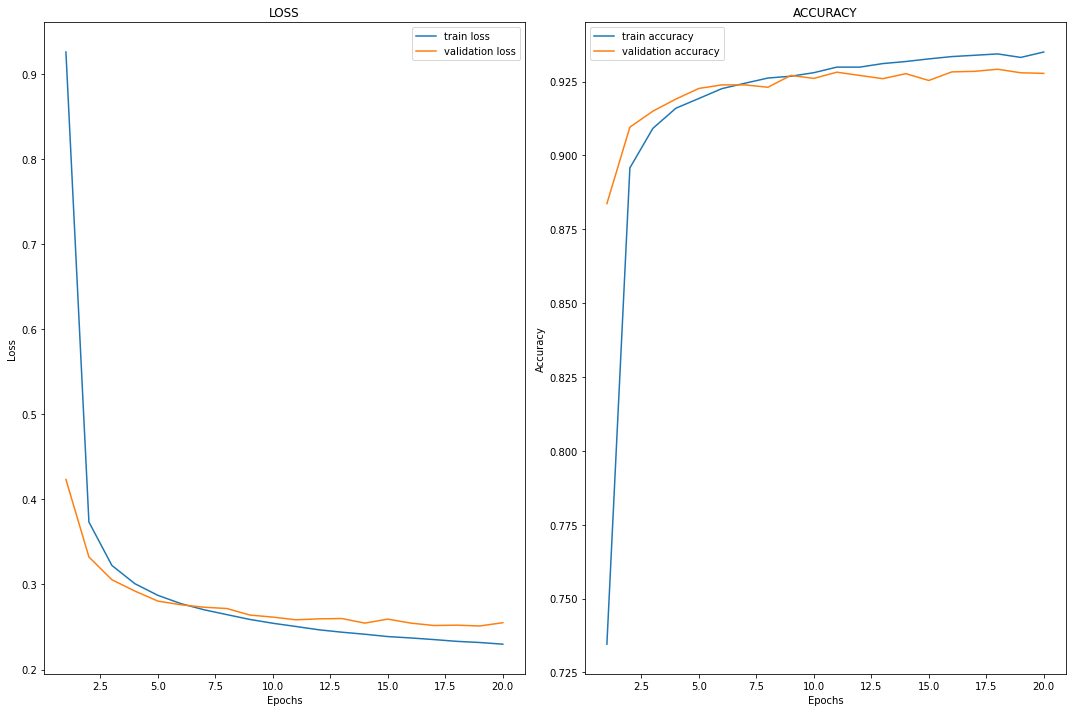

In [17]:
plot_result(history)

In [18]:
# 큰 모델
# hidden layer: 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    #Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
model = create_model()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [21]:
history = model.fit(train_dataset,
          epochs=N_EPOCHS,
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset,
          validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4786 - accuracy: 0.8655 - val_loss: 0.1212 - val_accuracy: 0.9626
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1005 - accuracy: 0.9679 - val_loss: 0.0857 - val_accuracy: 0.9730
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0803 - val_accuracy: 0.9753
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0797 - val_accuracy: 0.9764
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0722 - val_accuracy: 0.9791
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0939 - val_accuracy: 0.9757
Epoch 

<Figure size 1080x720 with 0 Axes>

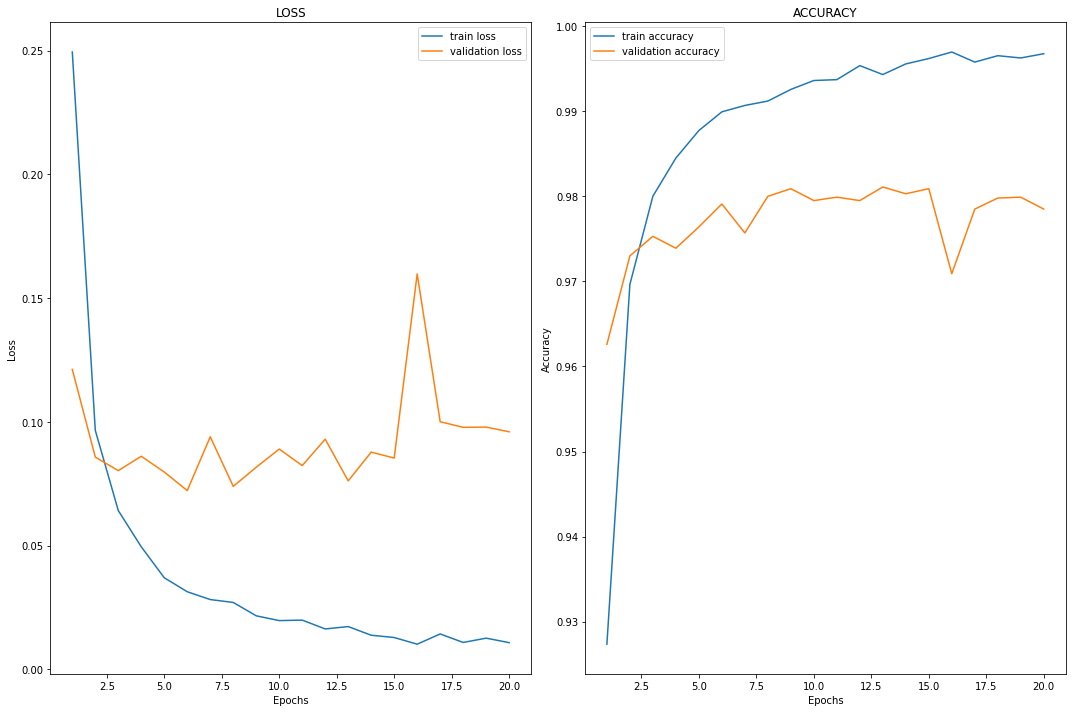

In [22]:
plot_result(history)

# Dropout 적용
- dropout layer는 적용하려는 layer 앞에 추가한다
- dropout 비율은 0 ~ 1 사이 실수로 지정하는데 보통 0.2 ~ 0.5의 값을 지정한다
- dropout이 적용된 모델을 학습시킬 때는 epoch 수를 더 늘려준다

In [23]:
DROPOUT_RATE = 0.5
def create_dropout_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    
    #Hidden Layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    #Output Layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    #컴파일
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [24]:
model = create_dropout_model()  #자동완성: ctrl + space
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

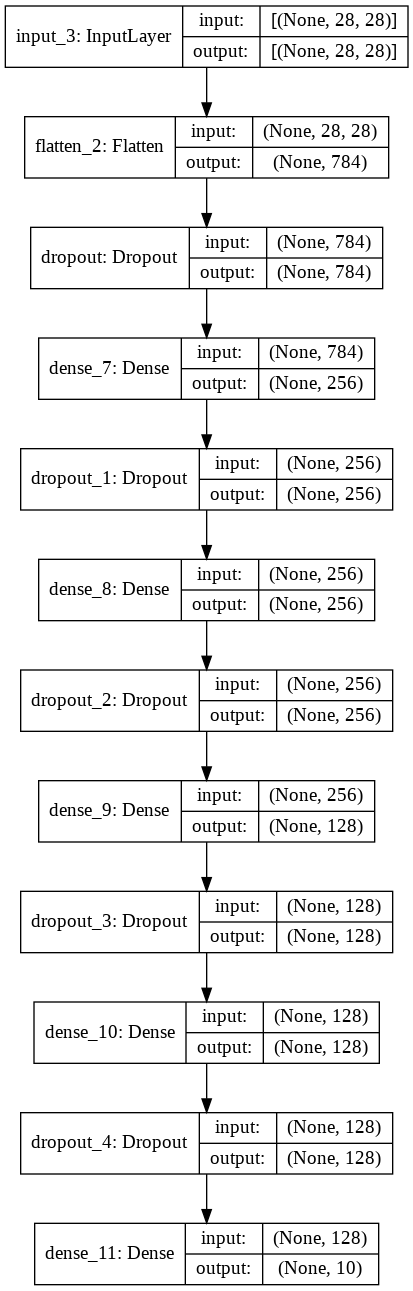

In [25]:
plot_model(model, show_shapes=True)

In [26]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 1.7042 - accuracy: 0.3811 - val_loss: 0.3354 - val_accuracy: 0.9149
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6112 - accuracy: 0.8231 - val_loss: 0.2149 - val_accuracy: 0.9420
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4661 - accuracy: 0.8694 - val_loss: 0.1736 - val_accuracy: 0.9519
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3938 - accuracy: 0.8932 - val_loss: 0.1531 - val_accuracy: 0.9575
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3528 - accuracy: 0.9034 - val_loss: 0.1460 - val_accuracy: 0.9585
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3470 - accuracy: 0.9075 - val_loss: 0.1344 - val_accuracy: 0.9618
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3142 - accuracy: 0.9168 - val_loss: 0.1236 - val_accuracy: 0.9656
Epoch 

<Figure size 1080x720 with 0 Axes>

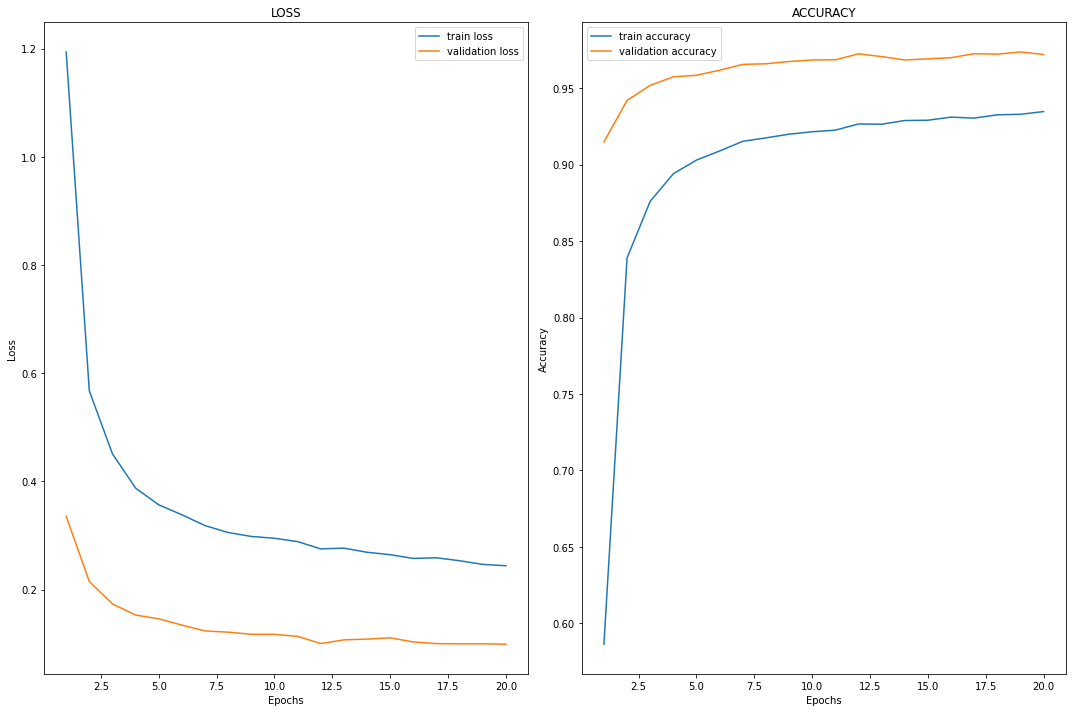

In [27]:
plot_result(history)

In [28]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9721


[0.09911815077066422, 0.972100019454956]

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
pred_dataset = X_test[:5]
pred_dataset.shape

(5, 28, 28)

In [31]:
pred = model.predict(pred_dataset)
np.argmax(pred, axis=-1)

array([7, 2, 1, 0, 4])

In [32]:
test_label[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Batch Normalization

In [33]:
def create_BN_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    #Hidden
    model.add(keras.layers.Dense(256))  #Fully Connected Layer(Dense)
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  #Activation Layer

    model.add(keras.layers.Dense(256))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    model.add(keras.layers.Dense(128))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    model.add(keras.layers.Dense(128))  
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())  

    #Output
    model.add(keras.layers.Dense(N_CLASS))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())

    #컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [34]:
model = create_BN_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [35]:
history = model.fit(train_dataset,
                     epochs=N_EPOCHS,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.6067 - accuracy: 0.8781 - val_loss: 0.1969 - val_accuracy: 0.9695
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1775 - accuracy: 0.9734 - val_loss: 0.1084 - val_accuracy: 0.9781
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1131 - accuracy: 0.9786 - val_loss: 0.0909 - val_accuracy: 0.9790
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0789 - accuracy: 0.9831 - val_loss: 0.0796 - val_accuracy: 0.9801
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0575 - accuracy: 0.9876 - val_loss: 0.0762 - val_accuracy: 0.9801
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0486 - accuracy: 0.9887 - val_loss: 0.0705 - val_accuracy: 0.9808
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0377 - accuracy: 0.9918 - val_loss: 0.0604 - val_accuracy: 0.9831
Epoch 

<Figure size 1080x720 with 0 Axes>

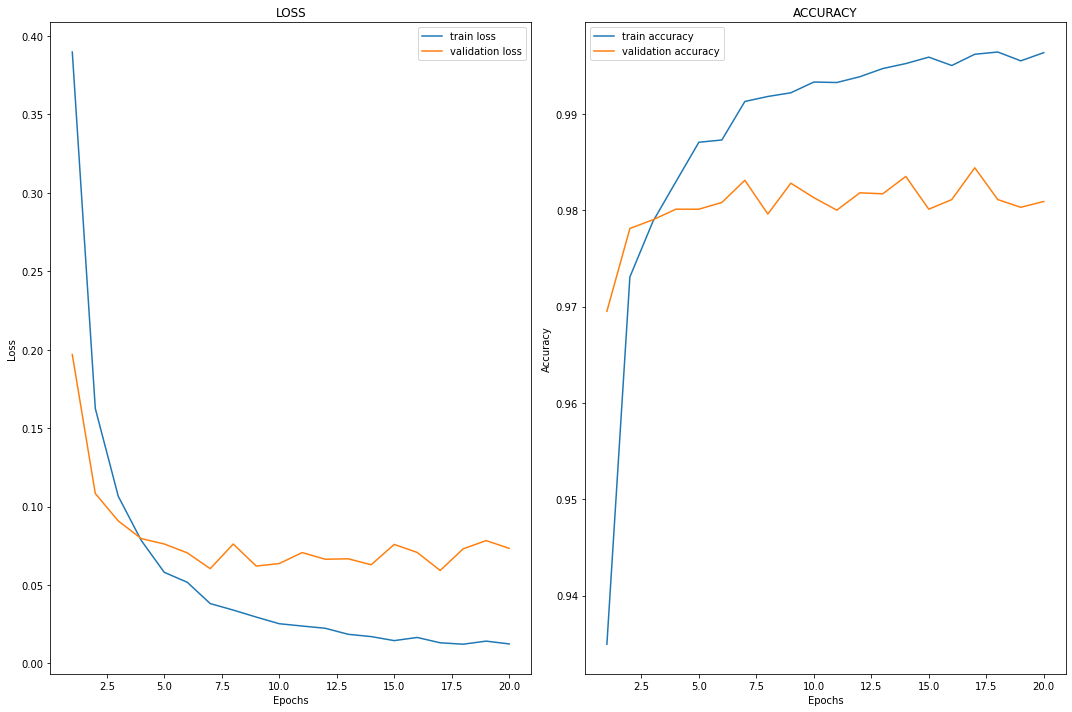

In [36]:
plot_result(history)

# 학습률 조절

In [38]:
LEARNING_RATE = 0.001
N_EPOCHS = 30

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))

    return model

## ExponentialDecay를 사용
- 일정한 step마다 일정한 비율로 학습률을 변경(줄여줌)
- LearningRate Scheduler

In [42]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                            initial_learning_rate=LEARNING_RATE,  #시작 학습률
                            decay_steps=100,  #몇 step마다 학습률을 변경시킬 것인지
                            decay_rate=0.5,  #학습률의 변롸율. 기존학습률 * 지정한 값
                            staircase=True  #True: 한번에 변경, False: 매 스텝마다 조금씩 변화
)  #optimizer의 학습률 대신 lr_scheduler를 설정

In [43]:
model = create_model()

In [45]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4865 - accuracy: 0.8583 - val_loss: 0.1695 - val_accuracy: 0.9497
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1646 - accuracy: 0.9529 - val_loss: 0.1674 - val_accuracy: 0.9504
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1623 - accuracy: 0.9545 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1668 - accuracy: 0.9533 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1664 - accuracy: 0.9532 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1633 - accuracy: 0.9547 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1695 - accuracy: 0.9528 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 

# LearningRate 조정과 관련 callback 사용
- Callback: 학습 도중 특정 이벤트(변화)가 발생하면 호출되는 기능

## ReduceLROnPlateau callback
- patience 에폭 동안 monitor에 지정한 지표가 향상되지 않으면 현재 learning_rate에 factor(0 ~ 1의 실수)를 곱해서 learning rate를 조정해줌

In [48]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# ReduceLROnPlateau callback 생성
lrp_callback = keras.callbacks.ReduceLROnPlateau(patience=10,  #10 에폭동안
                                                 monitor='val_loss',  #validation loss의 지표가 향상되지 않으면
                                                 factor=0.5,  #현재 학습률에 0.5 곱한 것을 새 학습률로 지정해라
                                                 verbose=1)  #학습률이 바귀면 로그를 출력

# Callback은 fit할 때 적용
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps, 
                    callbacks=[lrp_callback])                                                 

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4669 - accuracy: 0.8638 - val_loss: 0.1055 - val_accuracy: 0.9677
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0977 - accuracy: 0.9700 - val_loss: 0.0969 - val_accuracy: 0.9694
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0945 - val_accuracy: 0.9704
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0865 - val_accuracy: 0.9752
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0708 - val_accuracy: 0.9811
Epoch 

## LearningRateScheduler callback 사용
- 사용자 정의 학습률 조정함수를 만들어 적용
- 학습률 조정하는 함수를 만들어서 callback 생성 시 등록
    - 매개변수
        1. epoch
        2. 현 시점 learning rate
    - 반환값
        - 조정한 learning rate

In [50]:
def user_lr(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 10:
        if epoch == 6:
            print("================Change Learning Rate: ", lr*0.5)
        return lr*0.5
    elif epoch < 20:
        if epoch == 11:
            print("================Change Learning Rate: ", lr*0.5)
        return lr*0.5
    else:
        return lr

In [53]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[lr_scheduler_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4849 - accuracy: 0.8571 - val_loss: 0.1246 - val_accuracy: 0.9618
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.0936 - val_accuracy: 0.9709
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0594 - accuracy: 0.9807 - val_loss: 0.0858 - val_accuracy: 0.9735
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0651 - val_accuracy: 0.9796
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0622 - val_accuracy: 0.9827
Epoch 7/30
================Change Learning Rate:  0.0002500000118743628
600/600 [==============================] - 2s 3ms/step - loss: 0.0072 - accu